# Autoregression Model Based on Periodic Data

# In this activity, we will now use an autoregression model to fit the Austin weather dataset and predict future values.

<b> Import the packages and classes needed </b>

In [1]:
# import packages
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import warnings

<b> Load the Austin weather data </b>

In [2]:
# load data
df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
# checking column data types
df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [4]:
# converting column 'date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                         object
DewPointAvgF                          object
DewPointLowF                          object
HumidityHighPercent                   object
HumidityAvgPercent                    object
HumidityLowPercent                    object
SeaLevelPressureHighInches            object
SeaLevelPressureAvgInches             object
SeaLevelPressureLowInches             object
VisibilityHighMiles                   object
VisibilityAvgMiles                    object
VisibilityLowMiles                    object
WindHighMPH                           object
WindAvgMPH                            object
WindGustMPH                           object
PrecipitationSumInches                object
Events                                object
dtype: object

<b> Plot the complete set of average temperature values </b>

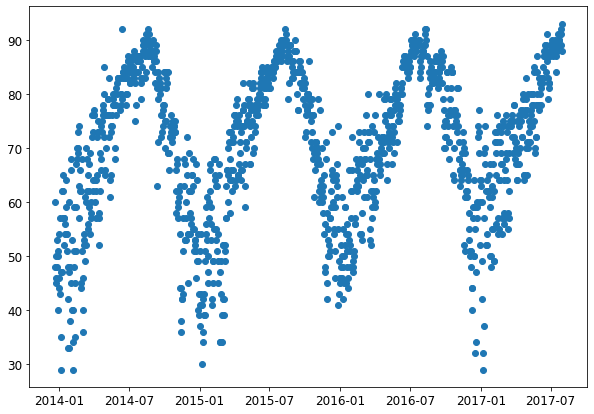

In [6]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.scatter(df.Date, df.TempAvgF)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

<b> Construct an autocorrelation plot to see whether the average temperature can be used with an autoregression model </b>

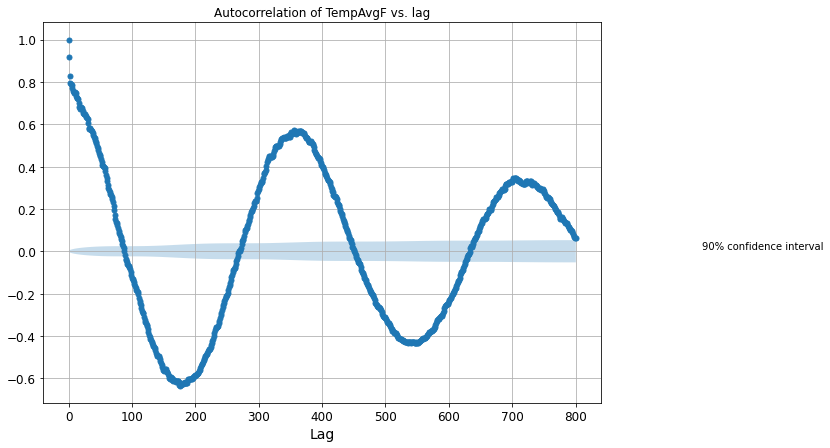

In [7]:
max_lag = 800
fig, ax = plt.subplots(figsize = (10, 7))
acf_plot = plot_acf(x = df.TempAvgF,
                    ax = ax,
                    lags = max_lag,
                    use_vlines = False,
                    alpha = 0.9,
                    title = 'Autocorrelation of TempAvgF vs. lag')
ax.grid(True)
ax.text(1000, 0.01, '90% confidence interval')
ax.set_xlabel('Lag', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

<b> Extract the actual ACF values using the numpy.correlate() </b>

In [8]:
corr0 = np.correlate(df.TempAvgF[0: ] - df.TempAvgF.mean(), 
                     df.TempAvgF[0: ] - df.TempAvgF.mean(), 
                     mode = 'valid')
corrs = [np.correlate(df.TempAvgF[:(df.TempAvgF.shape[0] - i)] - df.TempAvgF.mean(), 
                      df.TempAvgF[i: ] - df.TempAvgF.mean(), 
                      mode = 'valid')
        for i in range(max_lag)] / corr0

<b> Use the same plot_lag_grid function to investigate the correlation versus the lag plots at various correlation values </b>

In [9]:
# let's create a function to generate a grid of plots that we can
#use with various lag ranges, numbers of plots, and so on

def plot_lag_grid(series, corrs, axis_min, axis_max, num_plots, total_lag, n_rows, n_cols):
    lag_step = int(total_lag / num_plots)
    fig = plt.figure(figsize = (18, 16))
    for i in range(num_plots):
        corr = corrs[lag_step * i]
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.scatter(series, series.shift(lag_step * i))
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        ax.set_title('lag = ' + str(lag_step * i))
        ax.text(axis_min + 0.05 * (axis_max - axis_min),
                axis_max - 0.05 * (axis_max - axis_min),
                'correlation = ' + str(round(corr[0], 3)))
        fig.tight_layout()
    plt.show()

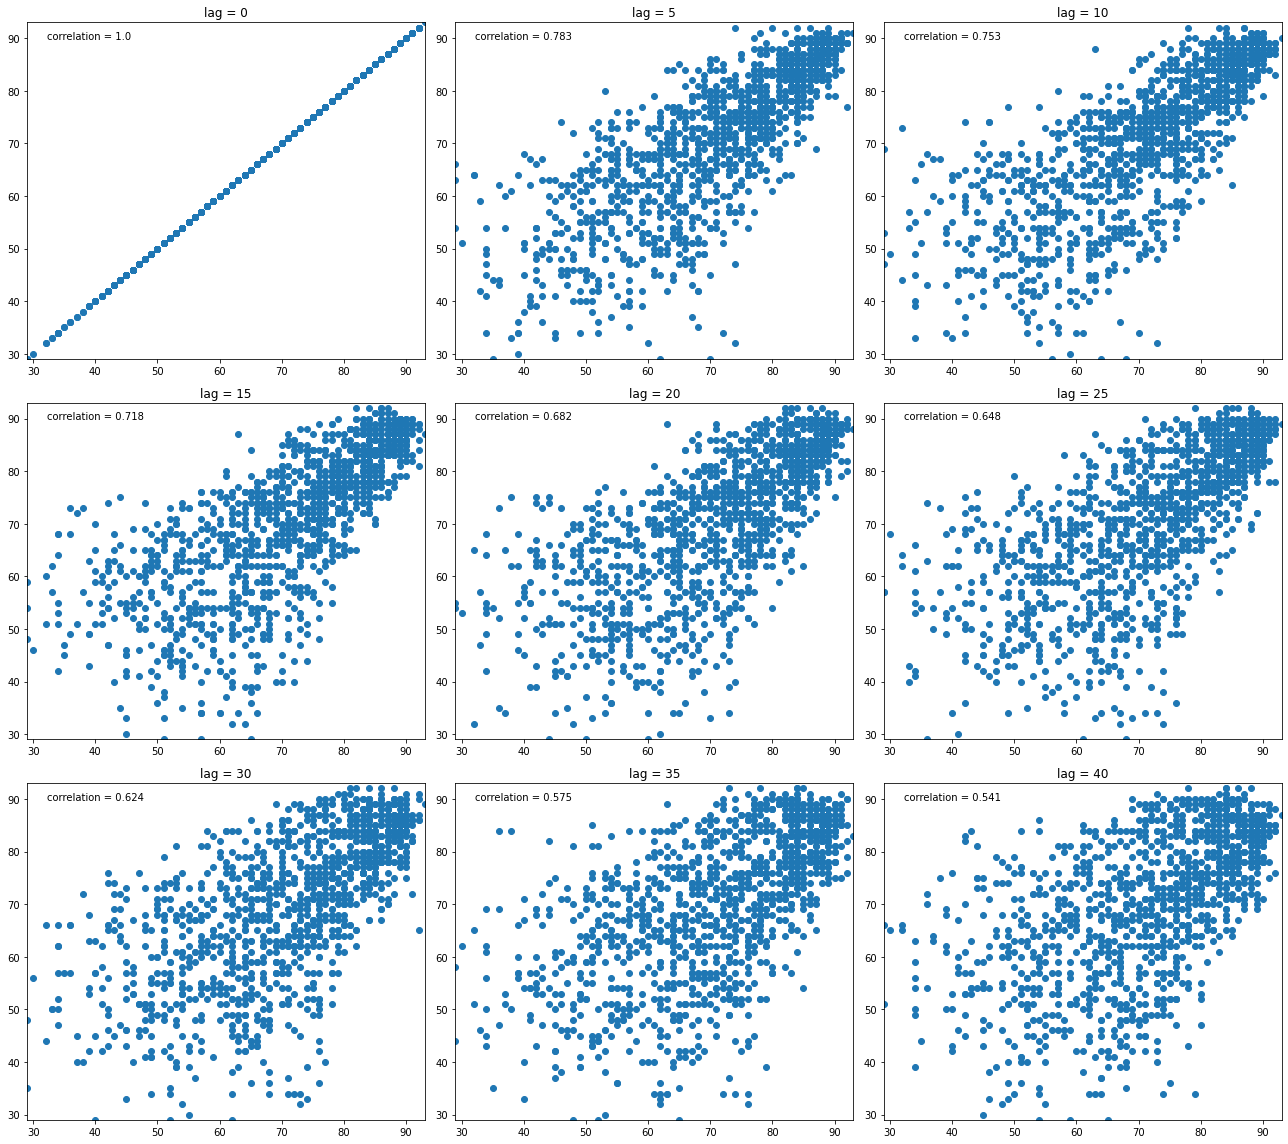

In [10]:
# autocorrelation plot with short lags
plot_lag_grid(df.TempAvgF, corrs,
              df.TempAvgF.min(), df.TempAvgF.max(),
              num_plots = 9,
              total_lag = 50,
              n_rows = 3, n_cols = 3)

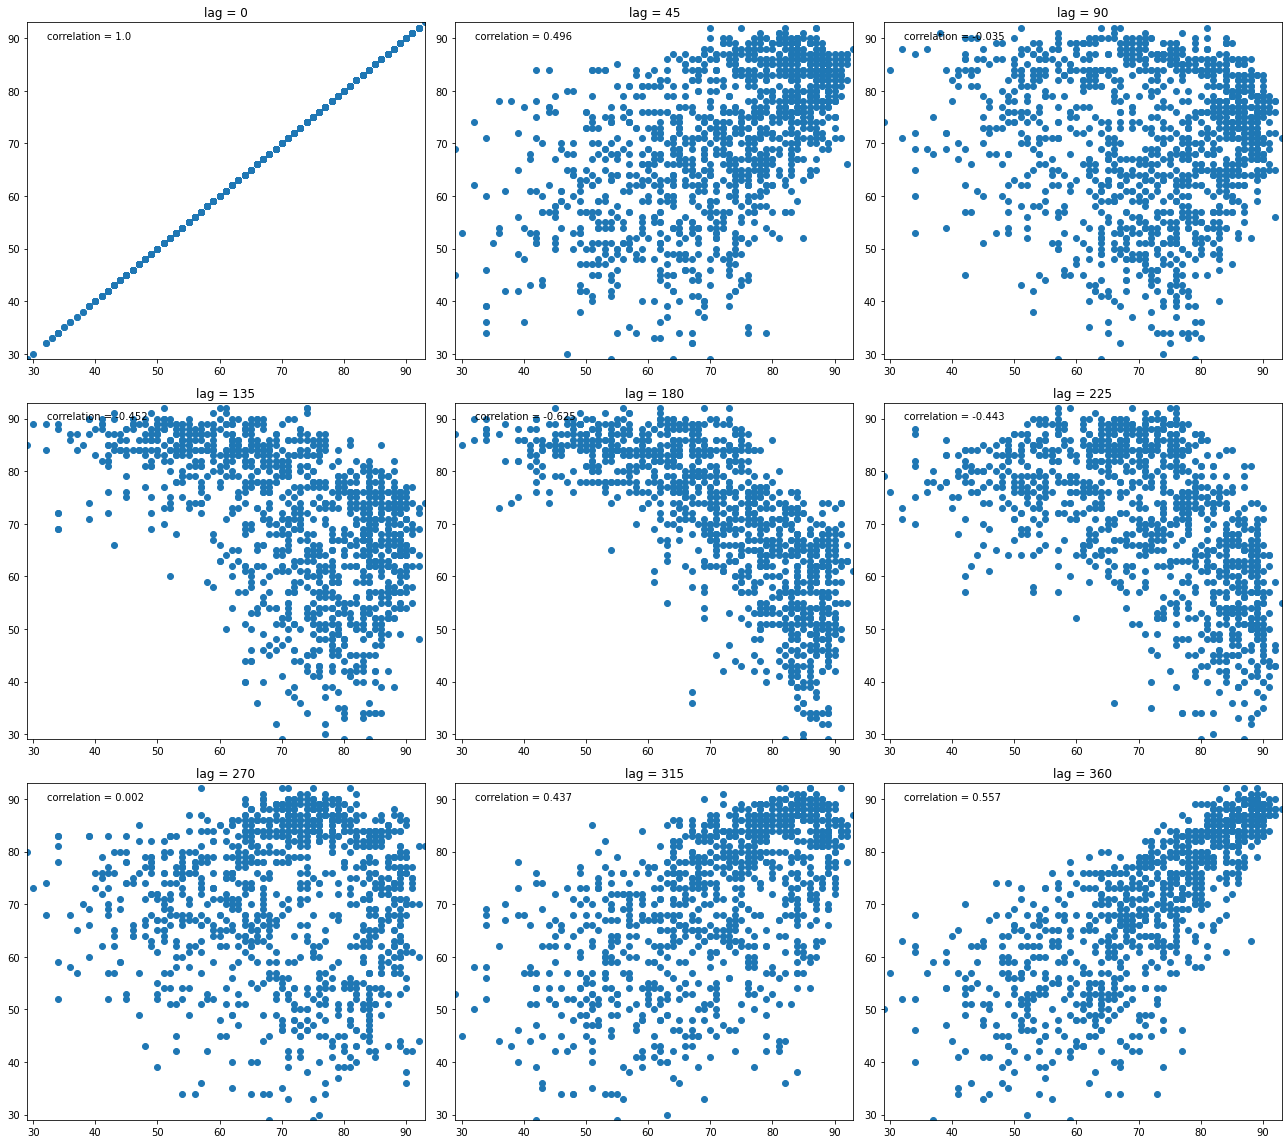

In [11]:
# autocorrelation plot with short lags
plot_lag_grid(df.TempAvgF, corrs,
              df.TempAvgF.min(), df.TempAvgF.max(),
              num_plots = 9,
              total_lag = 410,
              n_rows = 3, n_cols = 3)

<b> Use the statsmodels AR function and the model.fit() method to model the data </b>

In [12]:
model = AR(df.TempAvgF)
model_fit = model.fit()

C:\Users\Hevans\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN,

In [13]:
max_lag = model_fit.k_ar
print('max Lag: ' + str(max_lag))
print('Coefficients: \n' + str(model_fit.params))

max Lag: 23
Coefficients: 
const           1.909395
L1.TempAvgF     0.912076
L2.TempAvgF    -0.334043
L3.TempAvgF     0.157353
L4.TempAvgF     0.025721
L5.TempAvgF     0.041342
L6.TempAvgF     0.030831
L7.TempAvgF    -0.021230
L8.TempAvgF     0.020324
L9.TempAvgF     0.025147
L10.TempAvgF    0.059739
L11.TempAvgF   -0.017337
L12.TempAvgF    0.043553
L13.TempAvgF   -0.027795
L14.TempAvgF    0.053547
L15.TempAvgF    0.013070
L16.TempAvgF   -0.033157
L17.TempAvgF   -0.000072
L18.TempAvgF   -0.026307
L19.TempAvgF    0.025258
L20.TempAvgF    0.038341
L21.TempAvgF    0.007885
L22.TempAvgF   -0.008889
L23.TempAvgF   -0.011080
dtype: float64


<b> Use a maximum forecast period of 365 days and generate predictions from the model </b>

In [14]:
max_forecast = 365

pred_Temp = pd.DataFrame({'pred_Temp': model_fit.predict(start = max_lag,
                                             end = df.shape[0] + max_forecast - 1)})

In [15]:
# attach the dates for visualization
pred_Temp['Date'] = df['Date'].reindex()
pred_Temp.loc[(max(df.index) + 1):, 'Date'] = pd.to_datetime([max(df.Date) + pd.Timedelta(days = i)
                                                               for i in range(1, max_forecast + 1)])

<b> Plot the predictions as well as the original dataset </b>

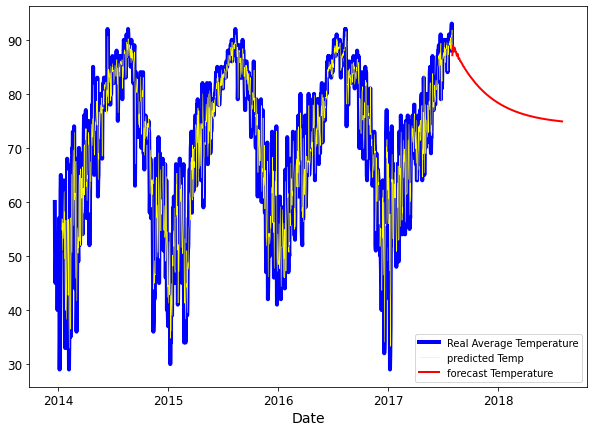

In [16]:
# visualizing real data and predictions
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(df.Date, 
        df.TempAvgF, 
        c = "blue", 
        linewidth = 4,
        label = 'Real Average Temperature')
ax.plot(pred_Temp.loc[0 : len(df.TempAvgF), 'Date'], 
        pred_Temp.loc[0 : len(df.TempAvgF), 'pred_Temp'], 
        c = "yellow", 
        linewidth = 0.5,
        label = 'predicted Temp')
ax.plot(pred_Temp.loc[len(df.TempAvgF):, 'Date'], 
        pred_Temp.loc[len(df.TempAvgF):, 'pred_Temp'], 
        c = "red", 
        linewidth = 2,
        label = 'forecast Temperature')
ax.set_xlabel('Date', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend()
plt.show()

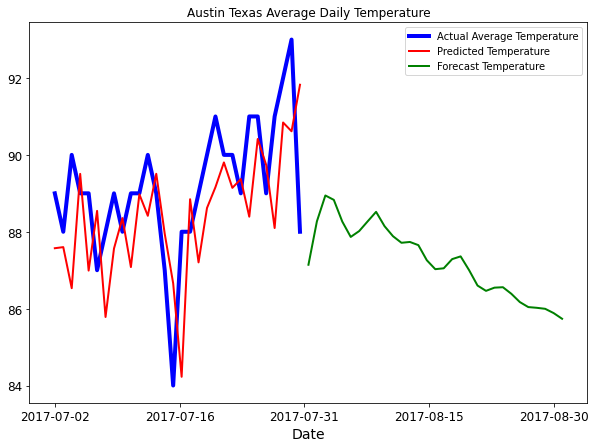

In [17]:
# zoom in on a window near the end of the raw data
window = 30
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(df.Date[(len(df.TempAvgF) - window) : len(df.TempAvgF)], 
        df.TempAvgF[(len(df.TempAvgF) - window) : len(df.TempAvgF)], 
        c = "blue", 
        linewidth = 4,
        label = 'Actual Average Temperature')
ax.plot(pred_Temp.Date.iloc[(-max_forecast - window):(-max_forecast)], 
        pred_Temp.pred_Temp.iloc[(-max_forecast - window):(-max_forecast)], 
        c = "red", 
        linewidth = 2,
        label = 'Predicted Temperature')
ax.plot(pred_Temp.loc[len(df.TempAvgF):(len(df.TempAvgF) + window), 'Date'], 
        pred_Temp.loc[len(df.TempAvgF):(len(df.TempAvgF) + window), 'pred_Temp'], 
        c = "green", 
        linewidth = 2,
        label = 'Forecast Temperature')
ax.set_xlabel('Date', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_title('Austin Texas Average Daily Temperature')
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_xticks(pd.date_range(df.Date[len(df.TempAvgF) - window],
              df.Date[len(df.TempAvgF) - 1] + pd.Timedelta(days = window), 5))
ax.legend()
plt.show()